In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
sns.set(style = 'darkgrid')

Data Transformation

In [5]:
df.rename({'age': 'Age', 'sex': 'Sex', 'cp': 'Chest Pain Type', 
           'trestbps': 'Resting Blood Pressure', 
           'chol': 'Serum Cholestoral', 'fbs': 'Fasting Blood Sugar', 
           'restecg': 'Resting Electrocardiographic Results', 'thalach': 'Maximum Heart Rate Achieved', 
           'exang': 'Exercise Induced Angina', 'oldpeak': 'Depression Induced By Exercise', 
           'slope': 'Slope Of The Peak Exercise', 'ca': 'Number Of Major Vessels',
          'thal':'Thal','target':'Target'},axis=1,inplace=True)
df.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,Depression Induced By Exercise,Slope Of The Peak Exercise,Number Of Major Vessels,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

In [7]:
df.columns

Index(['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure',
       'Serum Cholestoral', 'Fasting Blood Sugar',
       'Resting Electrocardiographic Results', 'Maximum Heart Rate Achieved',
       'Exercise Induced Angina', 'Depression Induced By Exercise',
       'Slope Of The Peak Exercise', 'Number Of Major Vessels', 'Thal',
       'Target'],
      dtype='object')

In [8]:
df.dtypes

Age                                       int64
Sex                                       int64
Chest Pain Type                           int64
Resting Blood Pressure                    int64
Serum Cholestoral                         int64
Fasting Blood Sugar                       int64
Resting Electrocardiographic Results      int64
Maximum Heart Rate Achieved               int64
Exercise Induced Angina                   int64
Depression Induced By Exercise          float64
Slope Of The Peak Exercise                int64
Number Of Major Vessels                   int64
Thal                                      int64
Target                                    int64
dtype: object

Data Cleaning

In [9]:
df.isnull().sum() # There is no null value for cleaning

Age                                     0
Sex                                     0
Chest Pain Type                         0
Resting Blood Pressure                  0
Serum Cholestoral                       0
Fasting Blood Sugar                     0
Resting Electrocardiographic Results    0
Maximum Heart Rate Achieved             0
Exercise Induced Angina                 0
Depression Induced By Exercise          0
Slope Of The Peak Exercise              0
Number Of Major Vessels                 0
Thal                                    0
Target                                  0
dtype: int64

In [10]:
df.describe()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,Depression Induced By Exercise,Slope Of The Peak Exercise,Number Of Major Vessels,Thal,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   303 non-null    int64  
 1   Sex                                   303 non-null    int64  
 2   Chest Pain Type                       303 non-null    int64  
 3   Resting Blood Pressure                303 non-null    int64  
 4   Serum Cholestoral                     303 non-null    int64  
 5   Fasting Blood Sugar                   303 non-null    int64  
 6   Resting Electrocardiographic Results  303 non-null    int64  
 7   Maximum Heart Rate Achieved           303 non-null    int64  
 8   Exercise Induced Angina               303 non-null    int64  
 9   Depression Induced By Exercise        303 non-null    float64
 10  Slope Of The Peak Exercise            303 non-null    int64  
 11  Number Of Major Ves

Data Analysis

In [12]:
grouped_df=pd.DataFrame(df.groupby("Target")[["Resting Blood Pressure","Serum Cholestoral","Maximum Heart Rate Achieved","Depression Induced By Exercise"]].mean())
grouped_df.head()

,Resting Blood Pressure,Serum Cholestoral,Maximum Heart Rate Achieved,Depression Induced By Exercise
Target,,,,
0,134.398551,251.086957,139.101449,1.585507
1,129.303030,242.230303,158.466667,0.583030


In [13]:
grouped_df=pd.DataFrame(df.groupby("Target")[["Resting Blood Pressure","Serum Cholestoral","Maximum Heart Rate Achieved","Depression Induced By Exercise"]].max())
grouped_df.head()

,Resting Blood Pressure,Serum Cholestoral,Maximum Heart Rate Achieved,Depression Induced By Exercise
Target,,,,
0,200,409,195,6.2
1,180,564,202,4.2


In [14]:
grouped_df=pd.DataFrame(df.groupby("Target")[["Resting Blood Pressure","Serum Cholestoral","Maximum Heart Rate Achieved","Depression Induced By Exercise"]].min())
grouped_df.head()

,Resting Blood Pressure,Serum Cholestoral,Maximum Heart Rate Achieved,Depression Induced By Exercise
Target,,,,
0,100,131,71,0.0
1,94,126,96,0.0


In [15]:
df['Target'].value_counts()

1    165
0    138
Name: Target, dtype: int64

In [16]:
df['Sex'].value_counts()

1    207
0     96
Name: Sex, dtype: int64

In [17]:
df['Chest Pain Type'].value_counts()

0    143
2     87
1     50
3     23
Name: Chest Pain Type, dtype: int64

In [18]:
df['Resting Electrocardiographic Results'].value_counts()

1    152
0    147
2      4
Name: Resting Electrocardiographic Results, dtype: int64

In [19]:
df['Exercise Induced Angina'].value_counts()

0    204
1     99
Name: Exercise Induced Angina, dtype: int64

In [20]:
df['Slope Of The Peak Exercise'].value_counts()

2    142
1    140
0     21
Name: Slope Of The Peak Exercise, dtype: int64

In [21]:
df['Number Of Major Vessels'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: Number Of Major Vessels, dtype: int64

Data Visualisation

<AxesSubplot:xlabel='Target', ylabel='count'>

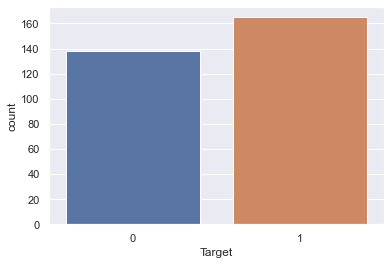

In [22]:
sns.countplot(x='Target',data=df)

<AxesSubplot:xlabel='Age', ylabel='Serum Cholestoral'>

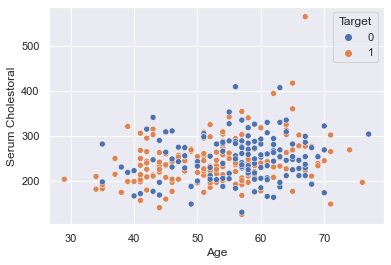

In [23]:
sns.scatterplot(x = 'Age', y = 'Serum Cholestoral',hue='Target', data = df)

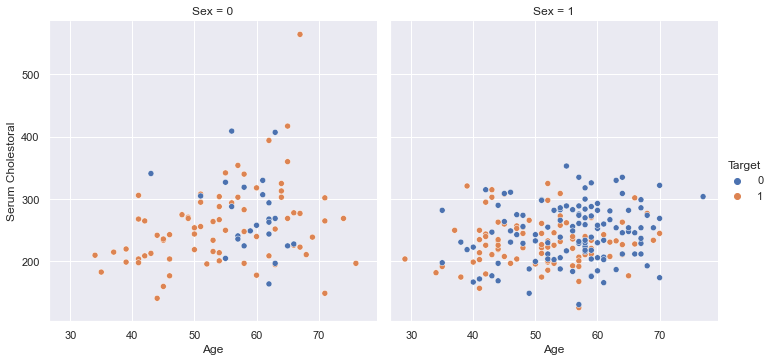

In [24]:
sns.relplot(x = 'Age', y = 'Serum Cholestoral',hue='Target',col='Sex', data = df)
plt.savefig('agevssex.png')

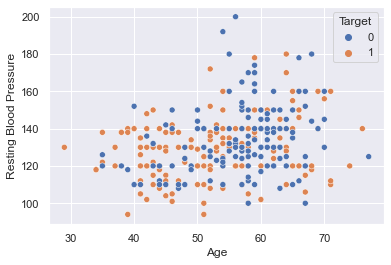

In [25]:
sns.scatterplot(x = 'Age', y = 'Resting Blood Pressure',hue='Target', data = df)
plt.savefig('agevsbloodpressure.png')

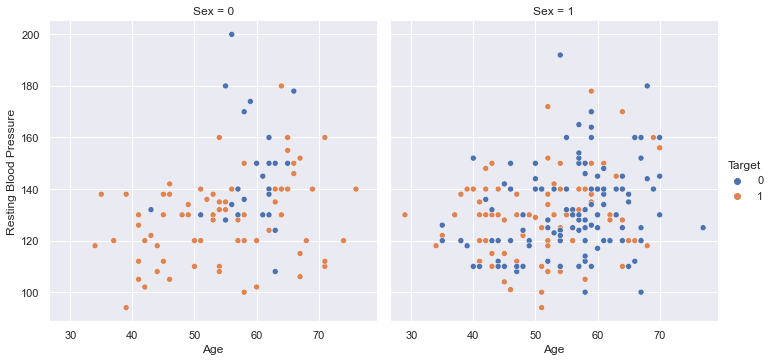

In [47]:
sns.relplot(x = 'Age', y = 'Resting Blood Pressure',hue='Target',col='Sex', data = df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

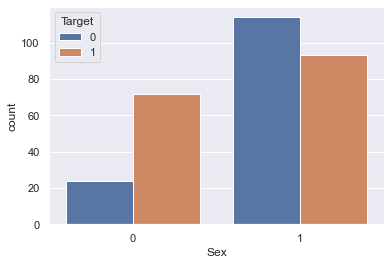

In [48]:
sns.countplot(x='Sex',hue='Target',data=df)

<AxesSubplot:xlabel='Fasting Blood Sugar', ylabel='count'>

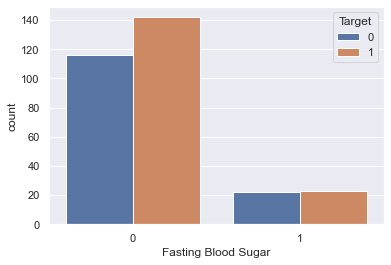

In [50]:
sns.countplot(x='Fasting Blood Sugar',hue='Target',data=df)

<AxesSubplot:xlabel='Resting Electrocardiographic Results', ylabel='count'>

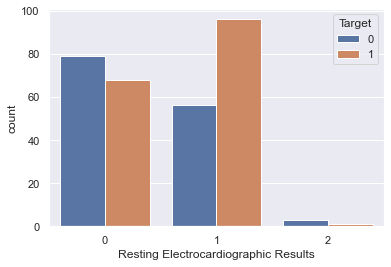

In [53]:
sns.countplot(x='Resting Electrocardiographic Results',hue='Target',data=df)

<AxesSubplot:xlabel='Chest Pain Type', ylabel='count'>

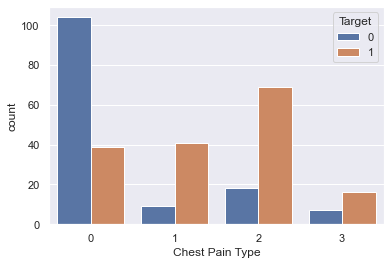

In [54]:
sns.countplot(x='Chest Pain Type',hue='Target',data=df)

Traing the model

Splitting Data

In [26]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [27]:
X.shape,y.shape

((303, 13), (303,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [29]:
y_train.shape, y_test.shape

((242,), (61,))

Creating the pipeline of different algorithms

In [30]:
pipeline = make_pipeline(RobustScaler()) # creating pipeline for model building

LR = make_pipeline(pipeline, LogisticRegression(random_state=0)) # LogisticRegression pipeline
DT = make_pipeline(pipeline, DecisionTreeClassifier(random_state=0)) # DecisionTree Classifier pipeline
RF = make_pipeline(pipeline, RandomForestClassifier(random_state=0)) # RandomForest Classifier pipeline
AC = make_pipeline(pipeline, AdaBoostClassifier(random_state=0)) # Adaboost Classifier pipeline
NB = make_pipeline(pipeline, GaussianNB()) # Naive bayes pipeline
KN = make_pipeline(pipeline, KNeighborsClassifier()) # KNeighbor pipeline
SV = make_pipeline(pipeline, SVC(random_state=0)) # Support vector pipeline

In [36]:
# creating model_dict
model_dictionary = {
    'Logistic_Regression':LR,
    'DecisionTree_Classifier':DT,
    'RandomForest_classifier':RF,
    'Adaboost_Classifier':AC,
    'Naivebayes_Classifier':NB,
    'KNeighbors_classifier':KN,
    'Support_Vector':SV
}
print(model_dictionary)

{'Logistic_Regression': Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('robustscaler', RobustScaler())])),
                ('logisticregression', LogisticRegression(random_state=0))]), 'DecisionTree_Classifier': Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('robustscaler', RobustScaler())])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))]), 'RandomForest_classifier': Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('robustscaler', RobustScaler())])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))]), 'Adaboost_Classifier': Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('robustscaler', RobustScaler())])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=0))]), 'Naivebayes_Classifier': Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('robustscaler', RobustScaler())])),
                (

In [37]:
# define a function to fit the model and return it's accuracy, classification report and confusion matrix
def model_fitting(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('The accuracy score of the model is: {}%'.format(accuracy_score(y_test, y_pred)* 100))
    print('-----'*20)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [38]:
for name, model in model_dictionary.items():
    print('---'*10)
    print(name)
    model_fitting(model)

------------------------------
Logistic_Regression
The accuracy score of the model is: 83.60655737704919%
----------------------------------------------------------------------------------------------------
[[21  6]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

------------------------------
DecisionTree_Classifier
The accuracy score of the model is: 78.68852459016394%
----------------------------------------------------------------------------------------------------
[[22  5]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61

Confusion Matrix And AUC curve for test data on Adaboost

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



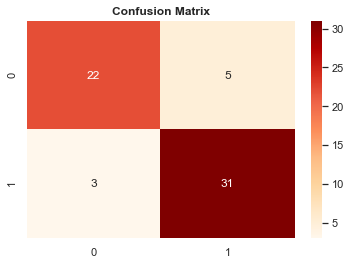

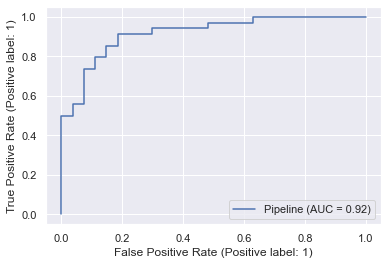

In [40]:
y_pred = model.predict(X_test)
def find_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='OrRd')
    plt.savefig('confusion_matrix.png')
    plt.title('Confusion Matrix', weight='bold')
    print(classification_report(y_test, y_pred))
    plot_roc_curve(model, X_test, y_test)
    plt.savefig('roc_aoc.png')
    
find_confusion_matrix(y_test, y_pred)